<a href="https://colab.research.google.com/github/melirandazzo/trabajo_ciencia_datos/blob/main/Actualizado_actividad_practica_APIs-Melina_Randazzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# Instalar la librería kaggle
!pip install kaggle

# Crear la carpeta .config/kaggle si no existe
!mkdir -p /root/.config/kaggle/

# Descargar el archivo kaggle.json desde GitHub
!wget --no-check-certificate 'https://raw.githubusercontent.com/melirandazzo/trabajo_ciencia_datos/main/Modulo2/kaggle/kaggle.json' -O /root/.config/kaggle/kaggle.json

# Configurar los permisos para el archivo kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

# Ver el nombre de los archivos del dataset
import kaggle
!kaggle datasets files ddosad/customer-behaviour-tourism-portal


--2024-08-17 19:45:54--  https://raw.githubusercontent.com/melirandazzo/trabajo_ciencia_datos/main/Modulo2/kaggle/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [text/plain]
Saving to: ‘/root/.config/kaggle/kaggle.json’

/root/.config/kaggl 100%[===================>]      63  --.-KB/s    in 0s      

2024-08-17 19:45:54 (2.42 MB/s) - ‘/root/.config/kaggle/kaggle.json’ saved [63/63]

name                             size  creationDate         
------------------------------  -----  -------------------  
Customer behaviour Tourism.csv  820KB  2023-11-13 15:17:10  


In [65]:
#Instalar libreria missingo
!pip install missingno

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import pandas as pd

import zipfile
import os

In [67]:
# Descargar el dataset desde Kaggle
!kaggle datasets download -d ddosad/customer-behaviour-tourism-portal

# Descomprimir el archivo descargado
dataset_zip = "customer-behaviour-tourism-portal.zip"
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(".")

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv("Customer behaviour Tourism.csv")
print(df.head())

Dataset URL: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal
License(s): other
customer-behaviour-tourism-portal.zip: Skipping, found more recently modified local copy (use --force to force download)
    UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3   

Dataset reference: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal

# Columnas:
**UserID**:	Unique ID of the user

**Yearly_avg_view_on_travel_page**:	Average yearly views on any travel-related page by the user

**preferred_device**:	Preferred device for user login

**total_likes_on_outstation_checkin_given**:	Total number of likes given by the user on out-of-station check-ins in the last year

**yearly_avg_Outstation_checkins**:	Average number of out-of-station check-ins done by the user

**member_in_family**:	Total number of relationships mentioned by the user in the account

**preferred_location_type**:	Preferred type of location for traveling by the user

**Yearly_avg_comment_on_travel_page**:	Average yearly comments on any travel-related page by the user

**total_likes_on_outofstation_checkin_received**:	Total number of likes received by the user on out-of-station check-ins in the last year

**week_since_last_outstation_checkin**:	Number of weeks since the last out-of-station check-in update by the user

**following_company_page**:	Whether the customer is following the company page (Yes or No)

**montly_avg_comment_on_company_page**:	Average monthly comments on the company page by the user

**working_flag**:	Whether the customer is working or not

**travelling_network_rating**:	The rating indicating if the user has close friends who also like traveling. 1 is high, 4 is lowest

**Adult_flag**:	Whether the customer is an adult or not

**Daily_Avg_mins_spend_on_traveling_page**:	Average time spent on the company's travel page by the user

In [68]:
# Ver la lista de columnas y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [69]:
df.describe().round(1)

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,11760.0,11179.0,11379.0,11554.0,11760.0,11760.0,11760.0,11760.0,11759.0,11759.0
mean,1005880.5,280.8,28170.5,74.8,6531.7,3.2,28.7,2.7,0.8,13.8
std,3395.0,68.2,14385.0,24.0,4706.6,2.6,48.7,1.1,0.9,9.1
min,1000001.0,35.0,3570.0,3.0,1009.0,0.0,4.0,1.0,0.0,0.0
25%,1002940.8,232.0,16380.0,57.0,2940.8,1.0,17.0,2.0,0.0,8.0
50%,1005880.5,271.0,28076.0,75.0,4948.0,3.0,22.0,3.0,1.0,12.0
75%,1008820.2,324.0,40525.0,92.0,8393.2,5.0,27.0,4.0,1.0,18.0
max,1011760.0,464.0,252430.0,815.0,20065.0,11.0,500.0,10.0,3.0,270.0


In [70]:
# Valores únicos para la columna yearly_avg_Outstation_checkins
print(df['yearly_avg_Outstation_checkins'].unique())

['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']


In [71]:
#Reemplazar * en la columna yearly_avg_Outstation_checkins por 0
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*', 0)
# Convertir la columna 'yearly_avg_Outstation_checkins' a tipo float64
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].astype('float64')

In [72]:
#Setear columnas categoricas con tipo de dato category
df["Taken_product"]= df["Taken_product"].astype("category")
df["preferred_device"]= df["preferred_device"].astype("category")
df["member_in_family"]=df["member_in_family"].astype("category")
df["preferred_location_type"]=df["preferred_location_type"].astype("category")
df["following_company_page"]=df["following_company_page"].astype("category")
df["working_flag"]=df["working_flag"].astype("category")
df.describe(include="category")

,Taken_product,preferred_device,member_in_family,preferred_location_type,following_company_page,working_flag
count,11760,11707,11760,11729,11657,11760
unique,2,10,7,15,5,3
top,No,Tab,3,Beach,No,No
freq,9864,4172,4561,2424,8355,9951


In [74]:
# Valores únicos para la columna 'Adult_flag'
print(df['Adult_flag'].unique())

# Valores únicos para la columna 'member_in_family'
print(df['member_in_family'].unique())


[ 0.  1.  3.  2. nan]
['2', '1', '4', 'Three', '3', '5', '10']
Categories (7, object): ['1', '10', '2', '3', '4', '5', 'Three']


In [75]:
# Basado en la información adquirida en Keaggle
# Reemplazar valores distintos a 0 de la columna Adult_flag por 1
df['Adult_flag'] = df['Adult_flag'].replace([2,3,4,5], 1)
df['Adult_flag'] = df['Adult_flag'].fillna(0)
df['Adult_flag'] = df['Adult_flag'].astype('int64')

In [76]:
# Reemplazar 'Three' por 3 en la columna 'member_in_family'
df['member_in_family'] = df['member_in_family'].replace('Three', 3)

# Convertir la columna 'member_in_family' a int64
df['member_in_family'] = df['member_in_family'].astype('int64')


In [77]:
#Ver valores distintos para las columnas following_company_page,	working_flag
print("Valores distintos para following_company_page:", df['following_company_page'].unique())
print("Valores distintos para working_flag:", df['working_flag'].unique())


Valores distintos para following_company_page: ['Yes', 'No', 'Yeso', NaN, '1', '0']
Categories (5, object): ['0', '1', 'No', 'Yes', 'Yeso']
Valores distintos para working_flag: ['No', 'Yes', '0']
Categories (3, object): ['0', 'No', 'Yes']


In [78]:
df["following_company_page"]=df["following_company_page"].astype("object")
# Reemplazar valores en la columna 'following_company_page'
df['following_company_page'] = df['following_company_page'].replace(['Yeso', '1'], 'Yes')
df['following_company_page'] = df['following_company_page'].fillna('No')
df['following_company_page'] = df['following_company_page'].replace('0', 'No')

# Verificar los valores únicos después de la limpieza
print("Valores distintos para following_company_page después de la limpieza:", df['following_company_page'].unique())


Valores distintos para following_company_page después de la limpieza: ['Yes' 'No']


In [79]:
# Reemplazar el valor '0' en la columna working_flag por No
df['working_flag'] = df['working_flag'].replace('0', 'No')


In [80]:
#Reemplazar "No" con 0 y "Yes" con 1 en las columnas especificadas
df['Taken_product'] = df['Taken_product'].replace({'No': 0, 'Yes': 1})
df['following_company_page'] = df['following_company_page'].replace({'No': 0, 'Yes': 1})
df['working_flag'] = df['working_flag'].replace({'No': 0, 'Yes': 1})


In [89]:
#Cambiar el tipo de datos de las columnas a 'int64'
df['Taken_product'] = df['Taken_product'].astype('int64')
df['following_company_page'] = df['following_company_page'].astype('int64')
df['working_flag'] = df['working_flag'].astype('int64')


<Axes: >

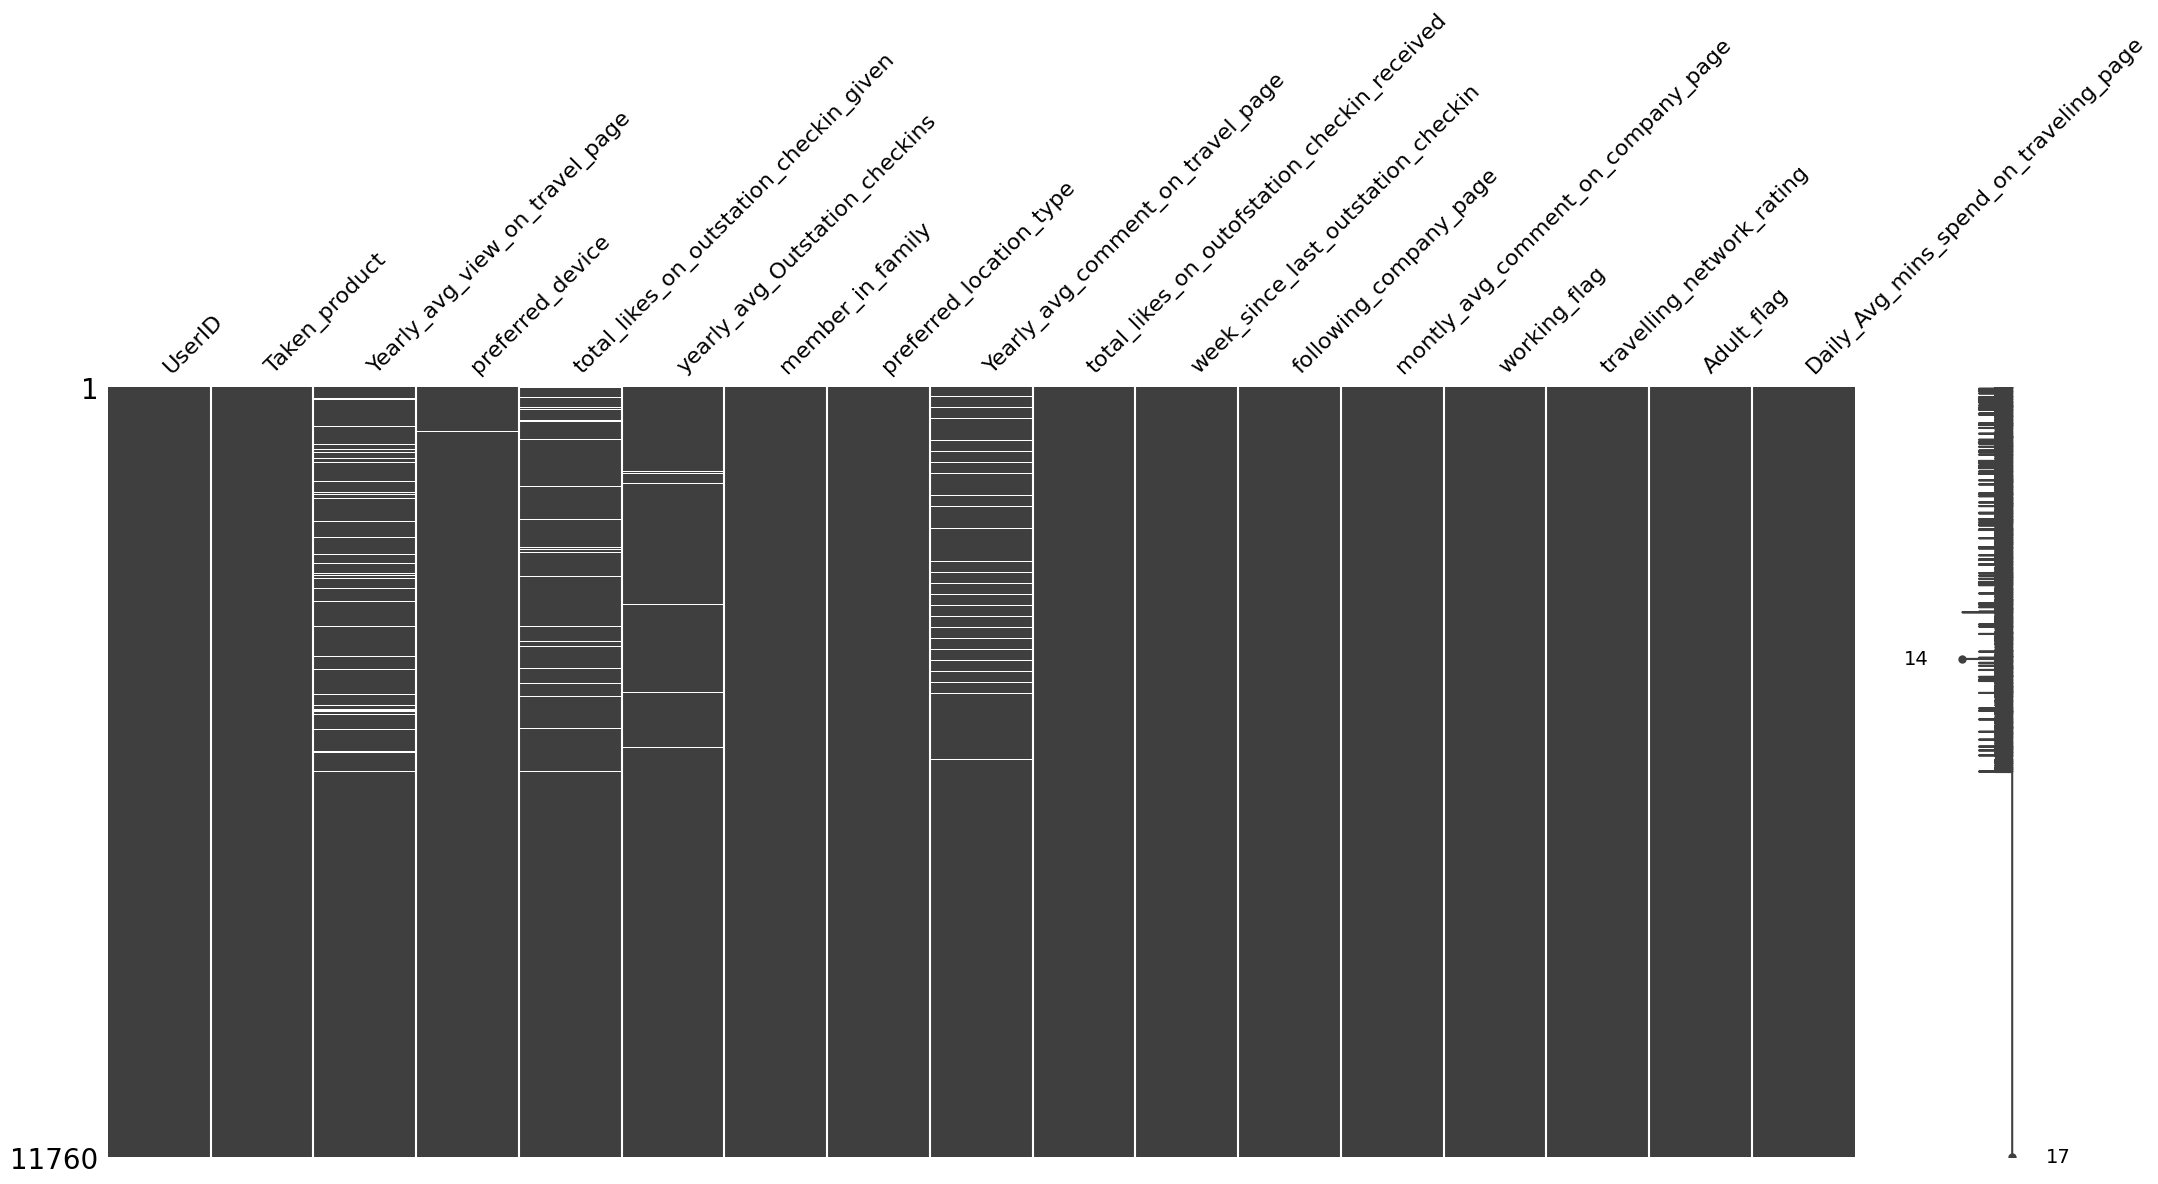

In [82]:
#Evaluar si hay valores nulos
msno.matrix(df)

Se detecta solo un valor nulo para la columna "preferred_device" por lo que se decide completarla con el valor moda "Tab".

Los nulos de las columnas "Yearly_avg_view_on_travel_page", "total_likes_on_outstation_checkin_given", "yearly_avg_Outstation_checkins", "Yearly_avg_comment_on_travel_page" dado que son valores de cantidad de interacciones del usuario con los sitios se decide reemplazar los nulos por 0.



In [83]:
#Reemplazar los nulos de la columna preferred_device por Tab
df['preferred_device'] = df['preferred_device'].fillna('Tab')

In [84]:
#Reemplazar los nulos de las columnas "Yearly_avg_view_on_travel_page", "total_likes_on_outstation_checkin_given", "yearly_avg_Outstation_checkins", "Yearly_avg_comment_on_travel_page" por 0
df['Yearly_avg_view_on_travel_page'] = df['Yearly_avg_view_on_travel_page'].fillna(0)
df['total_likes_on_outstation_checkin_given'] = df['total_likes_on_outstation_checkin_given'].fillna(0)
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].fillna(0)
df['Yearly_avg_comment_on_travel_page'] = df['Yearly_avg_comment_on_travel_page'].fillna(0)


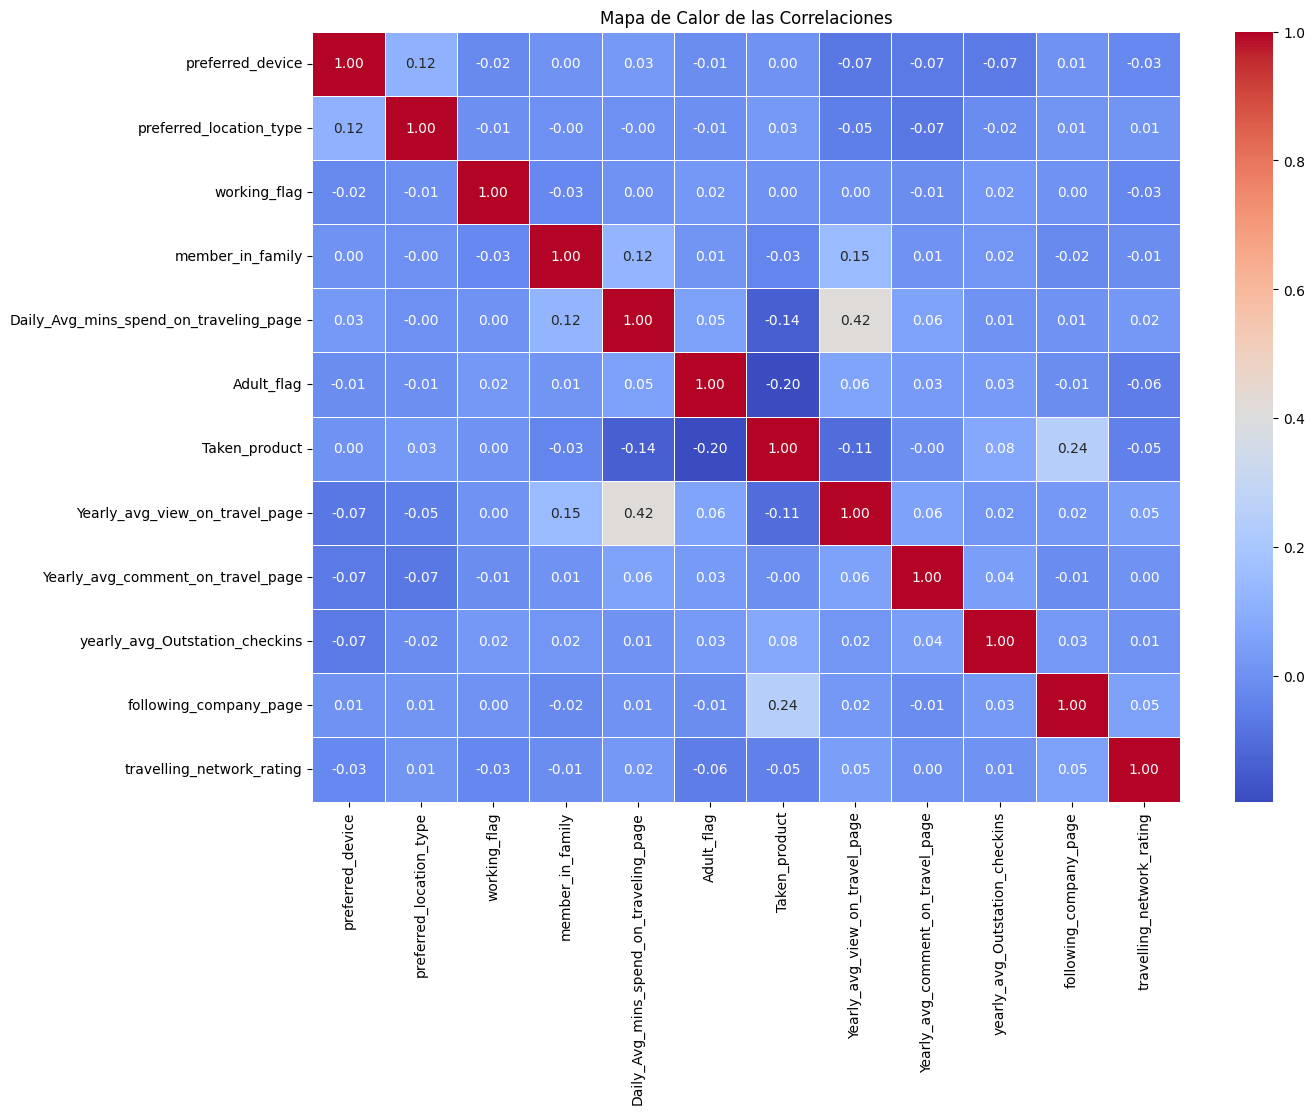

In [85]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Codificar las columnas categóricas seleccionadas
categorical_columns = ['preferred_device', 'preferred_location_type', 'working_flag', 'Adult_flag', 'Taken_product', 'following_company_page']

for col in categorical_columns:
    df_selected[col] = le.fit_transform(df_selected[col])

# Ahora calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Visualizar el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de las Correlaciones')
plt.show()

A partir del mapa de calor se observa una correlacion lineal positiva ente las personas que siguen el sitio web y efectivamente comprar el producto.
Tambien existe una correlacion entre la cantidad de miembros en la familia y el tiempo visitando sitios de viaje. Asi como tambien el tiempo visitando el sitio web muestra una correlación con la compra del producto.
Existe una correlacion entre los dispositivos utilizados y la locación preferida, pero esta correlación no resulta significativa para el analisis.

Ninguna de las variables presenta una correlación fuerte entre si, pero se puede ver el tiempo visitando los sitios, seguir el sitio web, la cantidad de miembros en la familia y la edad representan variables utiles para el analisis sobre turismo de este dataset.

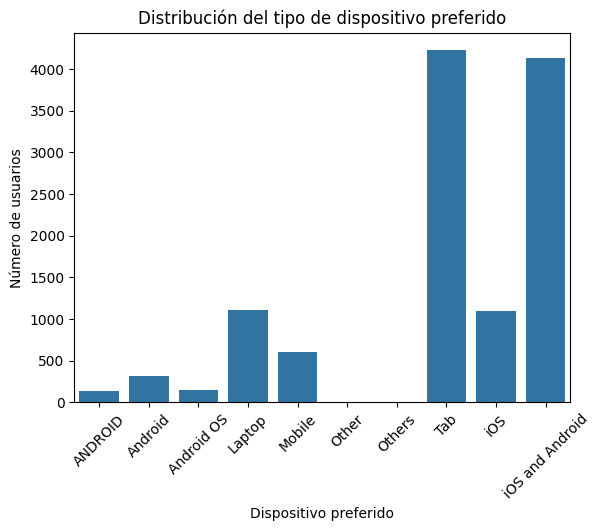

In [86]:
sns.countplot(x='preferred_device', data=df)
plt.title('Distribución del tipo de dispositivo preferido')
plt.xlabel('Dispositivo preferido')
plt.ylabel('Número de usuarios')
plt.xticks(rotation=45)
plt.show()

Los dispositivos preferidos para realizar busqueda de viajes son tablets y celuares tanto android como iphone.

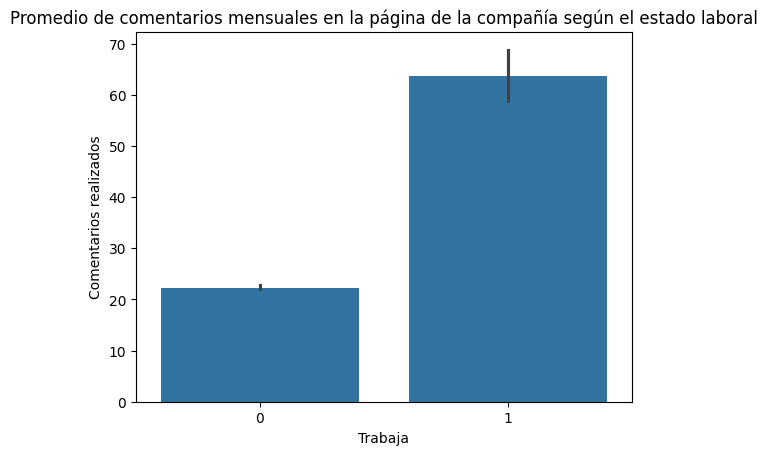

In [88]:
sns.barplot(x='working_flag', y='montly_avg_comment_on_company_page', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Promedio de comentarios mensuales en la página de la compañía según el estado laboral')
plt.xlabel('Trabaja')
plt.ylabel('Comentarios realizados')
plt.show()

Los usuarios que trabajan con quienes mas comentarios dejan en los sitios sobre los lugares de viajes.

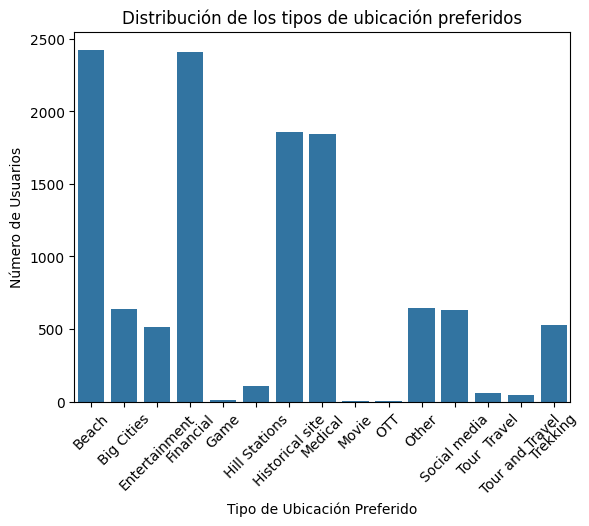

In [90]:
sns.countplot(x='preferred_location_type', data=df)
plt.title('Distribución de los tipos de ubicación preferidos')
plt.xlabel('Tipo de Ubicación Preferido')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45)
plt.show()

Los lugares más requeridos para viajar es la playa y lugares de entreteminiento. Seguido por montañas y lugares históricos.